In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
file = pd.read_csv('d:/softwares/stockreturn-larsen.csv')

In [16]:
file['MA10'] = file['close'].rolling(10).mean()
file['MEAN'] = file['close'].mean()
file = file.dropna()

In [17]:
file['Shares'] = [1 if file.loc[ei, 'MA10']>file.loc[ei, 'MEAN'] else 0 for ei in file.index]

In [18]:
file

,date,open,high,low,close,volume,Spread (),spread,MA10,MEAN,Shares
9,14/02/19,1788.95,1788.95,1763.25,1769.15,32711,25.70,19.80,1804.070,1728.0,1
10,15/02/19,1770.00,1795.00,1725.25,1781.05,100275,69.75,-11.05,1805.300,1728.0,1
11,18/02/19,1775.00,1775.00,1740.05,1748.00,74466,34.95,27.00,1804.630,1728.0,1
12,19/02/19,1742.25,1755.00,1725.15,1738.20,53503,29.85,4.05,1796.970,1728.0,1
13,20/02/19,1732.70,1768.90,1629.00,1735.50,142437,139.90,-2.80,1785.615,1728.0,1
14,21/02/19,1729.95,1748.20,1720.00,1725.55,57733,28.20,4.40,1771.055,1728.0,1
15,22/02/19,1732.80,1737.45,1711.30,1715.15,50313,26.15,17.65,1758.505,1728.0,1
16,25/02/19,1716.00,1732.75,1696.00,1704.35,82916,36.75,11.65,1749.430,1728.0,1
17,26/02/19,1695.00,1719.95,1680.50,1699.40,52708,39.45,-4.40,1740.565,1728.0,1
18,27/02/19,1714.85,1736.25,1692.05,1725.85,109195,44.20,-11.00,1734.220,1728.0,1


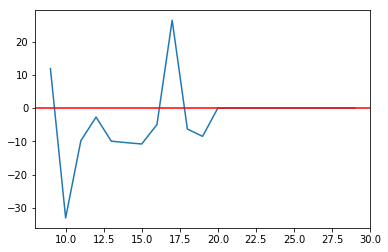

In [19]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss

file['close1'] = file['close'].shift(-1)
file['Profit'] = [file.loc[ei, 'close1'] - file.loc[ei, 'close'] if file.loc[ei, 'Shares']==1 else 0 for ei in file.index]
file['Profit'].plot()
plt.axhline(y=0, color='red')

In [20]:
file['wealth'] = file['Profit'].cumsum()
file.tail()

,date,open,high,low,close,volume,Spread (),spread,MA10,MEAN,Shares,close1,Profit,wealth
25,11/03/19,1641.35,1662.00,1616.05,1647.50,243191,45.95,-6.15,1681.830,1728.0,0,1630.40,0.0,-58.1
26,12/03/19,1648.00,1660.00,1624.00,1630.40,116165,36.00,17.60,1674.435,1728.0,0,1632.55,0.0,-58.1
27,13/03/19,1644.40,1665.00,1630.00,1632.55,146478,35.00,11.85,1667.750,1728.0,0,1655.95,0.0,-58.1
28,14/03/19,1646.95,1662.95,1633.00,1655.95,91460,29.95,-9.00,1660.760,1728.0,0,1618.65,0.0,-58.1
29,15/03/19,1662.00,1670.00,1613.00,1618.65,180262,57.00,43.35,1650.670,1728.0,0,NaN,0.0,-58.1


Text(0.5, 1.0, 'Total money you win is -58.100000000000136')

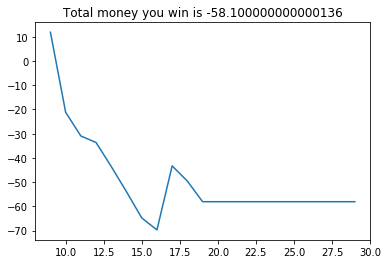

In [21]:
file['wealth'].plot()
plt.title('Total money you win is {}'.format(file.loc[file.index[-2], 'wealth']))